#  第一讲 复杂网络基础

In [1]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-
# Author ： 单哥的科研日常
# 关注B站和公众号：单哥的科研日常，获取更多讲解教程

### 实验环境：
### Python版本==3.9.16
### 依赖的第三方库：networkx==3.0, matplotlib==3.6.3, numpy==1.24.2, scipy==1.10.0
### （1）miniconda及其python虚拟环境安装教程见：https://www.bilibili.com/video/BV1dt4y1F7e4/?vd_source=519dd7a4b1f4260ebe31140657f52698
### （2）激活指定虚拟环境后，安装jupyter notebook，以及安装JupyterLab，详细教程见：https://www.cnblogs.com/catting123/p/16557462.html
### （3）在Jupyter Notebook中切换不同的python虚拟环境，教程见：https://www.ycpai.cn/python/4a6d7fbU.html

### 注意：针(3)一定要进入指定环境后，在执行以下命令：
pip install ipykernel

python -m ipykernel install --user --name 环境名 --display-name 环境名

### 否则就会出现类似于“No module xxx”的情况。

### (1) 创建一个简单的图

In [4]:
# 导入库
import networkx as nx

In [2]:
# 创建一个空图（不包含节点和边）
G = nx.Graph()
# 添加节点
G.add_nodes_from([1,2,3,4])
# 添加边
G.add_edges_from([(1,2),(1,3),(2,3),(2,4)])

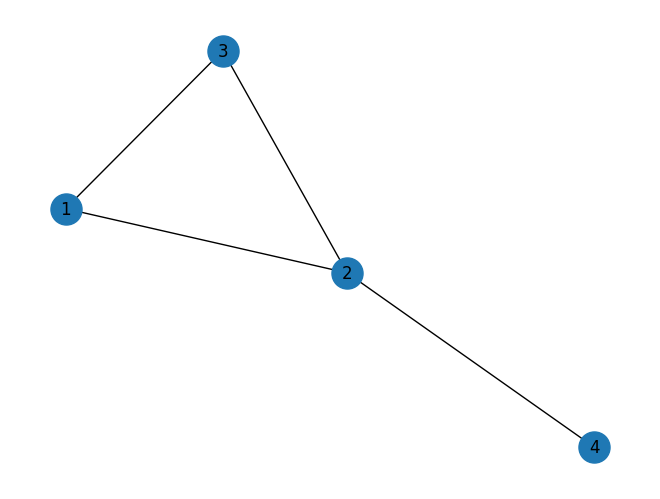

In [3]:
# 可视化
nx.draw(G, node_size=500, with_labels=True)

### (2) 获取图的邻接矩阵

In [4]:
As = nx.adjacency_matrix(G)
print(As)

  (0, 1)	1
  (0, 2)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 0)	1
  (2, 1)	1
  (3, 1)	1


In [5]:
# 转化成二维数组形式的矩阵
A = As.todense()
print(A)

[[0 1 1 0]
 [1 0 1 1]
 [1 1 0 0]
 [0 1 0 0]]


### (3) 已知图的邻接矩阵，创建图

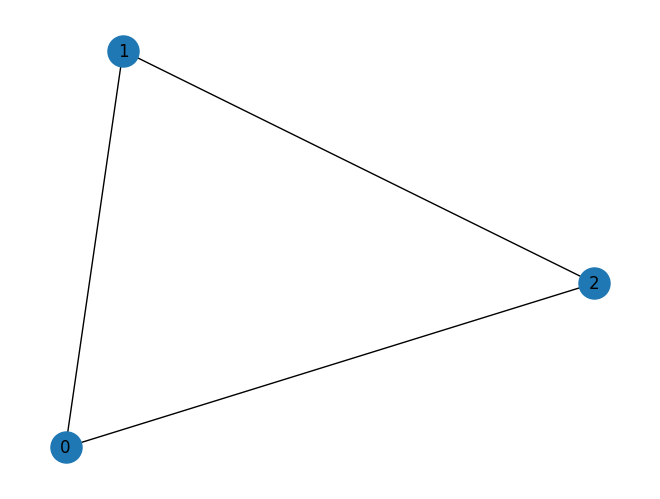

In [7]:
import numpy as np
A = np.array([[0, 1, 1], [1, 0, 1], [1, 1, 0]])
# G = nx.from_numpy_matrix(A) # 在3.0版中已经删除这个函数：AttributeError: module 'networkx' has no attribute 'from_numpy_matrix'
G = nx.from_numpy_array(A)
nx.draw(G, node_size=500, with_labels=True)

### (4) 加权图

In [5]:
G = nx.Graph()
G.add_weighted_edges_from([(0, 1, 3.0), (1, 2, 7.5), (0, 2, 1.5)])
As = nx.adjacency_matrix(G)
print(As.todense())

[[0.  3.  1.5]
 [3.  0.  7.5]
 [1.5 7.5 0. ]]


### (5) 有向图

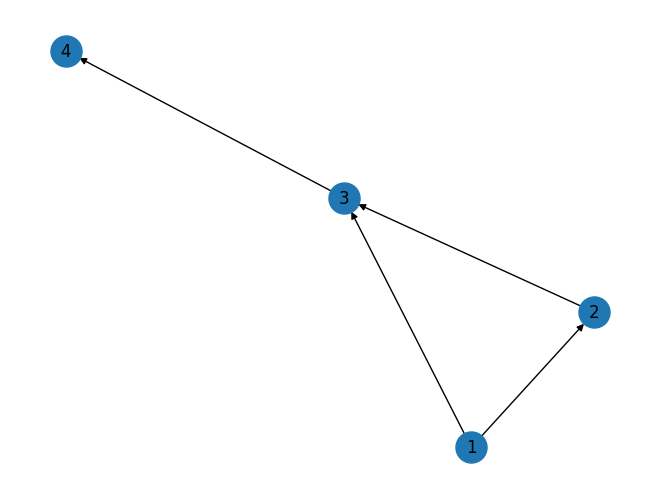

In [9]:
G = nx.DiGraph()
# 添加节点
G.add_nodes_from([1,2,3,4])
# 添加边
G.add_edges_from([(1,2),(1,3),(2,3),(3,4)])
nx.draw(G, node_size=500, with_labels=True)

### (6) 度、平均度以及度分布

In [10]:
G = nx.Graph()
# 添加节点
G.add_nodes_from([1,2,3,4])
# 添加边
G.add_edges_from([(1,2),(2,3),(2,4),(3,4)])

In [11]:
# 获取网络G的度
d = nx.degree(G)

In [12]:
d = dict(nx.degree(G))
print(d)
print("平均度为：", sum(d.values())/len(G.nodes))

{1: 1, 2: 3, 3: 2, 4: 2}
平均度为： 2.0


In [13]:
# 获取度分布
nx.degree_histogram(G) # 返回所有位于区间[0, dmax]的度值的频率列表

[0, 1, 2, 1]

#### 绘制度分布直方图

In [14]:
import matplotlib.pyplot as plt

In [15]:
x = list(range(max(d.values())+1))
y = [i/len(G.nodes) for i in nx.degree_histogram(G)]
print(x)
print(y)

[0, 1, 2, 3]
[0.0, 0.25, 0.5, 0.25]


(0.0, 4.0)

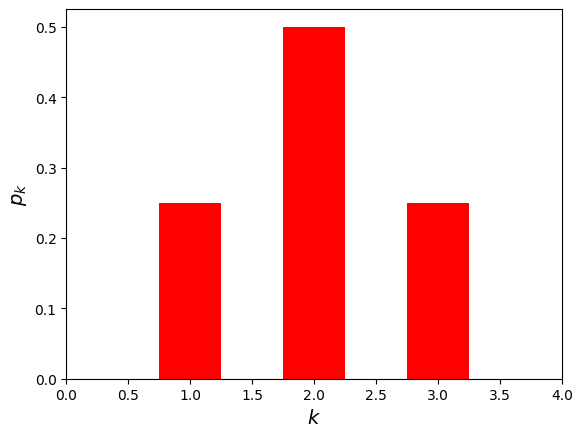

In [16]:
plt.bar(x, y, width=0.5, color="red")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("$p_k$", fontsize=14)
plt.xlim([0,4])

### (7) 路径和距离

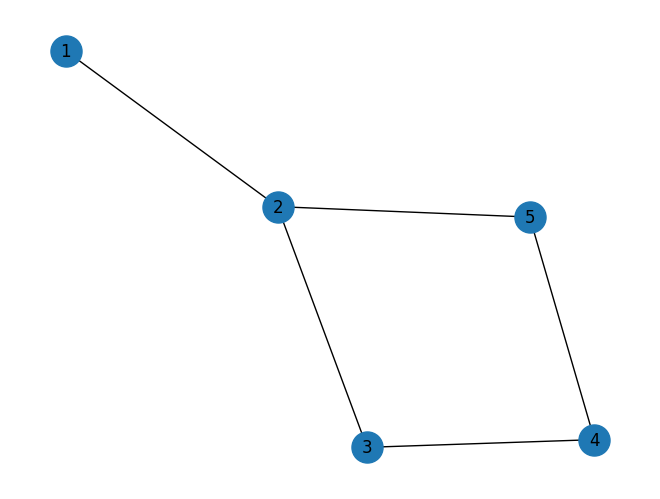

In [17]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(1,2),(2,3),(2,5),(3,4),(4,5)])
nx.draw(G, node_size=500, with_labels=True)

In [18]:
nx.shortest_path(G, source=1, target=4)

[1, 2, 3, 4]

In [19]:
# 两个节点之间所有的最短路径
list(nx.all_shortest_paths(G, source=1, target=4))

[[1, 2, 3, 4], [1, 2, 5, 4]]

In [20]:
# 求两个节点的最短路径长度（距离）
nx.shortest_path_length(G, source=1, target=4)

3

In [21]:
# 求整个网络的平均距离
nx.average_shortest_path_length(G)

1.6

### (8) 连通性

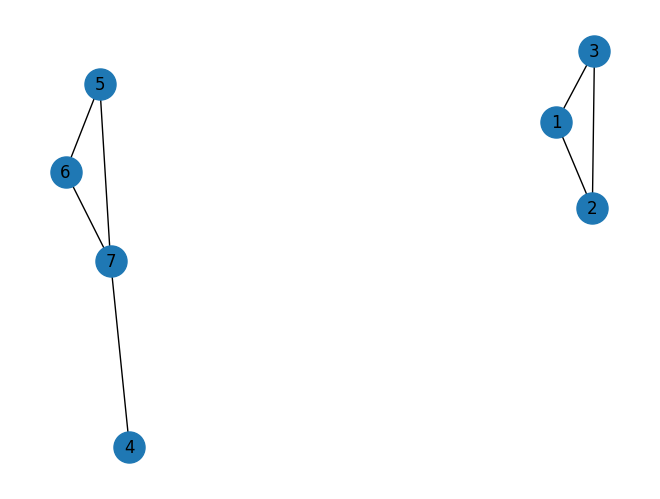

In [24]:
Ga = nx.Graph()
Ga.add_nodes_from([1,2,3,4,5,6,7])
Ga.add_edges_from([(1,2),(1,3),(2,3),(4,7),(5,6),(5,7),(6,7)])
nx.draw(Ga, node_size=500, with_labels=True)

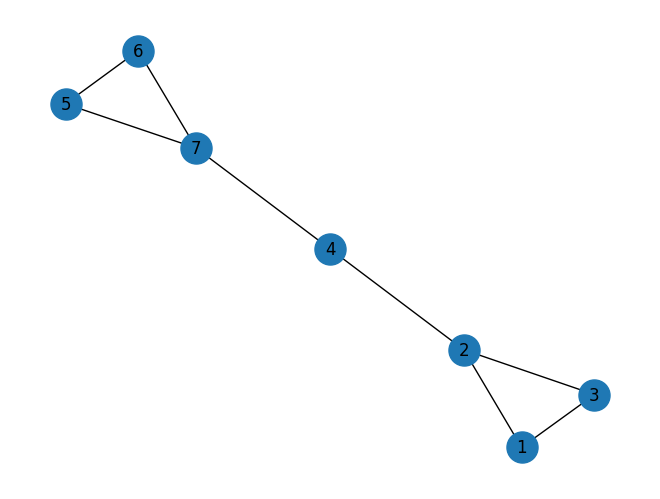

In [25]:
Gb = nx.Graph()
Gb.add_nodes_from([1,2,3,4,5,6,7])
Gb.add_edges_from([(1,2),(1,3),(2,3),(2,4),(4,7),(5,6),(5,7),(6,7)])
nx.draw(Gb, node_size=500, with_labels=True)

In [26]:
print(nx.is_connected(Ga))
print(nx.is_connected(Gb))

False
True


### (9) 集聚系数

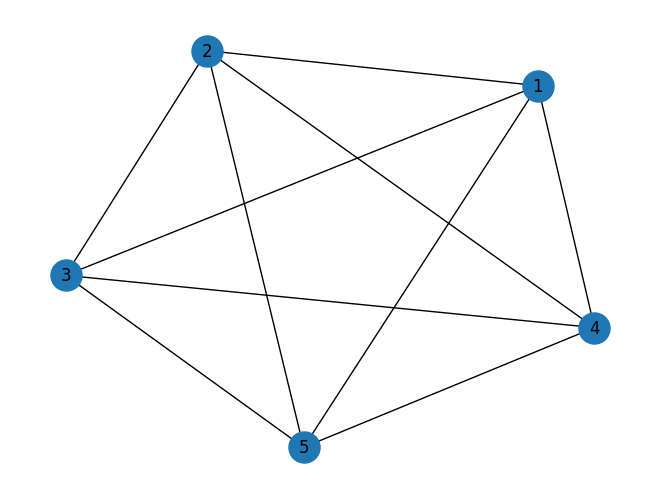

In [27]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(1,2),(1,3),(1,4),(1,5),(2,3),(2,4),(2,5),(3,4),(3,5),(4,5)])
nx.draw(G, node_size=500, with_labels=True)

In [28]:
print(nx.clustering(G, 1))

1.0


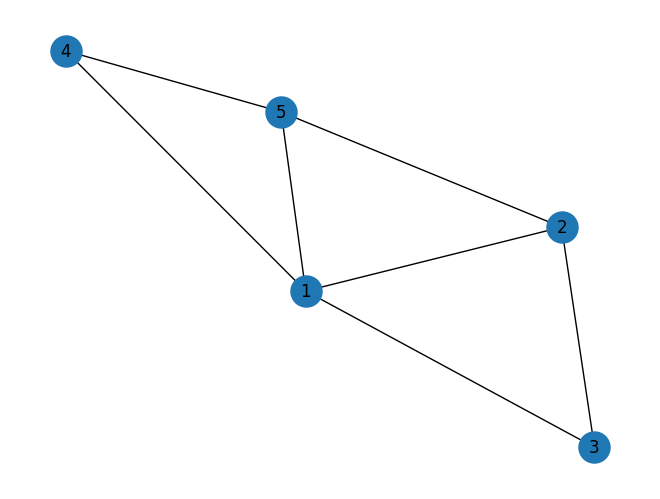

In [29]:
G.remove_edges_from([(2,4),(3,4),(3,5)])
nx.draw(G, node_size=500, with_labels=True)

In [30]:
print(nx.clustering(G, 1))

0.5


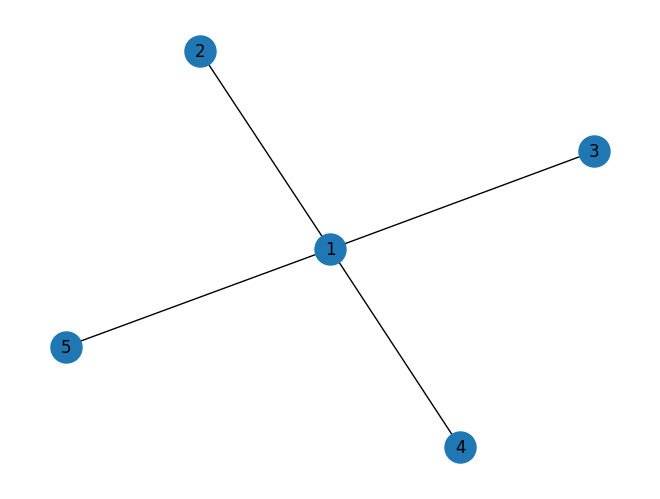

In [31]:
G.remove_edges_from([(2,3),(2,5),(4,5)])
nx.draw(G, node_size=500, with_labels=True)

In [32]:
print(nx.clustering(G, 1))

0


#### 平均集聚系数与全局集聚系数的区别

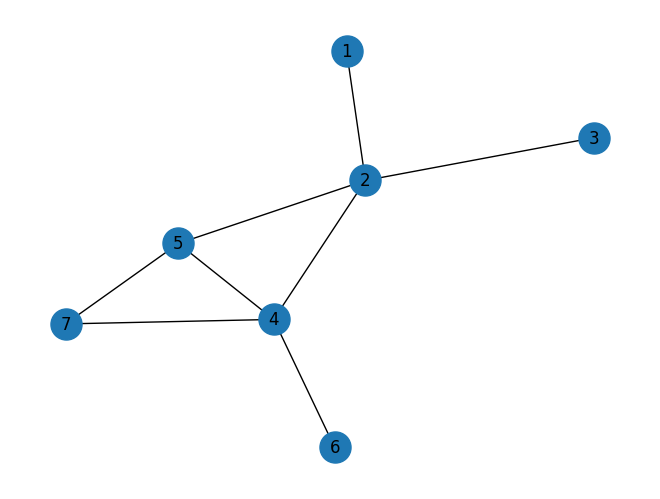

In [33]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7])
G.add_edges_from([(1,2),(2,3),(2,4),(2,5),(4,5),(4,6),(4,7),(5,7)])
nx.draw(G, node_size=500, with_labels=True)

In [34]:
# 平均集聚系数
print(nx.average_clustering(G))

0.3095238095238095


In [35]:
# 全局集聚系数
print(nx.transitivity(G))

0.375
